In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = "./Database/customer_shopping_data .csv"

vendas_df = pd.read_csv(file)
vendas_df["invoice_date"] = pd.to_datetime(vendas_df["invoice_date"], format= "%d/%m/%Y")


In [31]:
vendas_df.head(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [32]:
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [33]:
vendas_df.describe().round(2)

,age,quantity,price,invoice_date
count,99457.00,99457.00,99457.00,99457
mean,43.43,3.00,689.26,2022-02-04 02:46:59.783424
min,18.00,1.00,5.23,2021-01-01 00:00:00
25%,30.00,2.00,45.45,2021-07-19 00:00:00
50%,43.00,3.00,203.30,2022-02-05 00:00:00
75%,56.00,4.00,1200.32,2022-08-22 00:00:00
max,69.00,5.00,5250.00,2023-03-08 00:00:00
std,14.99,1.41,941.18,NaN


In [34]:
# 1. Qual é o valor médio das compras por categoria de produto?

display(vendas_df["category"].unique())


array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [35]:
categoria_df = vendas_df.groupby("category")[["price","quantity"]].sum().reset_index()
categoria_df["valormedio"] = categoria_df["price"] / categoria_df["quantity"]
categoria_df

,category,price,quantity,valormedio
0,Books,226977.30,14982,15.15
1,Clothing,31075684.64,103558,300.08
2,Cosmetics,1848606.90,45465,40.66
3,Food & Beverage,231568.71,44277,5.23
4,Shoes,18135336.89,30217,600.17
5,Souvenir,174436.83,14871,11.73
6,Technology,15772050.00,15021,1050.00
7,Toys,1086704.64,30321,35.84


In [205]:
# Quais foram as compras realizadas por clientes com pagamento realizado em dinheiro (payment_method = 'cash') 
# em  dois shoppings específicos (shopping_mall = 'A' ou shopping_mall = 'B')?
# Kanyon
# Forum Istanbul
Kanyon_cash_df = vendas_df.query("shopping_mall == 'Kanyon' and payment_method == 'Cash'")
Kanyon_cash_df




,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
23,I252275,C313348,Male,44,Technology,5,5250.00,Cash,2021-10-26,Kanyon
38,I106674,C204279,Male,54,Clothing,2,600.16,Cash,2022-02-27,Kanyon
56,I258195,C213742,Male,43,Toys,2,71.68,Cash,2021-11-26,Kanyon
58,I263803,C112279,Female,67,Food & Beverage,3,15.69,Cash,2021-06-23,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99434,I186560,C117024,Female,39,Shoes,1,600.17,Cash,2022-03-21,Kanyon
99439,I522661,C776199,Female,58,Food & Beverage,4,20.92,Cash,2021-02-01,Kanyon
99440,I887161,C137631,Female,58,Clothing,1,300.08,Cash,2021-06-22,Kanyon
99445,I750456,C270290,Female,35,Food & Beverage,5,26.15,Cash,2021-05-07,Kanyon


In [204]:
Forum_Istanbul_df = vendas_df.loc[(vendas_df["shopping_mall"] == "Forum Istanbul") & (vendas_df["payment_method"] == "Cash")]
Forum_Istanbul_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
70,I402376,C309926,Male,34,Shoes,5,3000.85,Cash,2022-09-10,Forum Istanbul
97,I153930,C567813,Male,39,Food & Beverage,3,15.69,Cash,2022-08-09,Forum Istanbul
123,I133387,C271799,Female,60,Toys,4,143.36,Cash,2021-06-07,Forum Istanbul
217,I771414,C183404,Male,63,Food & Beverage,3,15.69,Cash,2022-12-09,Forum Istanbul
281,I177201,C309645,Female,66,Clothing,5,1500.40,Cash,2022-02-04,Forum Istanbul
...,...,...,...,...,...,...,...,...,...,...
99350,I163275,C246601,Female,54,Cosmetics,2,81.32,Cash,2022-01-20,Forum Istanbul
99356,I269681,C103515,Male,34,Books,4,60.60,Cash,2021-08-05,Forum Istanbul
99368,I120067,C230620,Male,45,Clothing,5,1500.40,Cash,2021-01-02,Forum Istanbul
99427,I934204,C188412,Female,62,Cosmetics,4,162.64,Cash,2022-08-31,Forum Istanbul


In [11]:
# 3. Qual é a idade média dos clientes por categoria de produto?
idadeCat_df = vendas_df.groupby("category")["age"].mean()
idadeCat_df.reset_index().rename(columns= {"age":"idade média"})


,category,idade média
0,Books,43.541859
1,Clothing,43.409227
2,Cosmetics,43.580645
3,Food & Beverage,43.354426
4,Shoes,43.454953
5,Souvenir,43.393079
6,Technology,43.368495
7,Toys,43.326262


In [4]:
# 4. Quais são os três meses com o maior valor total gasto em compras?
mesesTotal_df = vendas_df.groupby([vendas_df["invoice_date"].dt.year.rename("ano"), vendas_df["invoice_date"].dt.month.rename("mes")])["price"].sum()
mesesTotal_df =mesesTotal_df.reset_index()
mesesTotal_df.head(10)

,ano,mes,price
0,2021,1,2656422.78
1,2021,2,2358636.34
2,2021,3,2618434.14
3,2021,4,2558825.62
4,2021,5,2662369.93
5,2021,6,2547239.73
6,2021,7,2802468.58
7,2021,8,2632303.32
8,2021,9,2530305.88
9,2021,10,2782418.40


In [45]:
#TOP 3 Mêses com maiores vendas
topMeses_df = mesesTotal_df.sort_values("price", ascending=False).head(3)
topMeses_df

,ano,mes,price
6,2021,7,2802468.58
9,2021,10,2782418.40
21,2022,10,2755839.69


In [38]:
# 5. Qual é a distribuição de gênero dos clientes em cada shopping center?

#Agrupando por shopping, separando por genero e contando por id

genShopping_df = vendas_df.groupby(["shopping_mall","gender"])["customer_id"].count().reset_index()
genShopping_df.head(10)

,shopping_mall,gender,customer_id
0,Cevahir AVM,Female,2940
1,Cevahir AVM,Male,2051
2,Emaar Square Mall,Female,2842
3,Emaar Square Mall,Male,1969
4,Forum Istanbul,Female,3016
5,Forum Istanbul,Male,1931
6,Istinye Park,Female,5874
7,Istinye Park,Male,3907
8,Kanyon,Female,11906
9,Kanyon,Male,7917


In [187]:
#Utilizando um pivot table para melhor visualizar os dados
genShop2_df = genShopping_df.pivot_table(index = "shopping_mall", columns= "gender", values = "customer_id").reset_index().rename_axis(None, axis=1)
genShop2_df 


,shopping_mall,Female,Male
0,Cevahir AVM,2940,2051
1,Emaar Square Mall,2842,1969
2,Forum Istanbul,3016,1931
3,Istinye Park,5874,3907
4,Kanyon,11906,7917
5,Mall of Istanbul,11902,8041
6,Metrocity,8941,6070
7,Metropol AVM,6144,4017
8,Viaport Outlet,2949,1965
9,Zorlu Center,2968,2107


In [5]:
#outra maneira, usando pivot_table de uma vez
novo_df = pd.pivot_table(vendas_df, index = "shopping_mall", columns="gender", values= "customer_id", aggfunc= "count").reset_index()
novo_df = novo_df.rename_axis(None, axis=1)
novo_df

,shopping_mall,Female,Male
0,Cevahir AVM,2940,2051
1,Emaar Square Mall,2842,1969
2,Forum Istanbul,3016,1931
3,Istinye Park,5874,3907
4,Kanyon,11906,7917
5,Mall of Istanbul,11902,8041
6,Metrocity,8941,6070
7,Metropol AVM,6144,4017
8,Viaport Outlet,2949,1965
9,Zorlu Center,2968,2107


In [191]:
# 6. Qual é o método de pagamento mais comum para cada categoria de produto?
pagamentoCategoria_df = vendas_df.groupby(["category","payment_method"])["customer_id"].count().reset_index()
pagamentoCategoria_df.head(10)


,category,payment_method,customer_id
0,Books,Cash,2268
1,Books,Credit Card,1696
2,Books,Debit Card,1017
3,Clothing,Cash,15456
4,Clothing,Credit Card,12025
5,Clothing,Debit Card,7006
6,Cosmetics,Cash,6674
7,Cosmetics,Credit Card,5336
8,Cosmetics,Debit Card,3087
9,Food & Beverage,Cash,6587


In [193]:
pagCategoria_df = pagamentoCategoria_df.pivot_table(index = "category",columns="payment_method", values="customer_id").reset_index()
pagCategoria_df = pagCategoria_df.rename_axis(None,axis=1) #Remover indice indesejado
pagCategoria_df

,category,Cash,Credit Card,Debit Card
0,Books,2268,1696,1017
1,Clothing,15456,12025,7006
2,Cosmetics,6674,5336,3087
3,Food & Beverage,6587,5250,2939
4,Shoes,4474,3553,2007
5,Souvenir,2211,1770,1018
6,Technology,2235,1753,1008
7,Toys,4542,3548,1997


In [29]:
# 7. Quais são as três categorias de produtos mais populares entre os clientes do gênero masculino e feminino? 
clintes_sexo = pd.pivot_table(vendas_df, index = "category", columns= "gender", values = "customer_id", aggfunc= "count").reset_index()
clintes_sexo = clintes_sexo.rename_axis(None,axis=1)
clintes_sexo

,category,Female,Male
0,Books,2906,2075
1,Clothing,20652,13835
2,Cosmetics,9070,6027
3,Food & Beverage,8804,5972
4,Shoes,5967,4067
5,Souvenir,3017,1982
6,Technology,2981,2015
7,Toys,6085,4002


In [30]:
#top clientes masculinos unicos por categoria
clientes_masculinos = clintes_sexo.drop(columns=["Female"])
clientes_masculinos =clientes_masculinos.sort_values(by = "Male", ascending= False)
clientes_masculinos.head(3)

,category,Male
1,Clothing,13835
2,Cosmetics,6027
3,Food & Beverage,5972


In [34]:
#top clientes femininos unicos por categoria
clientes_femininos = clintes_sexo.drop(columns= "Male")
clientes_femininos = clientes_femininos.sort_values(by = "Female", ascending= False)
clientes_femininos.head(3)


,category,Female
1,Clothing,20652
2,Cosmetics,9070
3,Food & Beverage,8804


In [52]:
# 8. Quais são os cinco dias da semana com o maior valor médio gasto em compras?
dias_semana_df = pd.DataFrame(vendas_df[["invoice_date","price"]])
dias_semana_df["dia_semana"] = dias_semana_df["invoice_date"].dt.day_name()
dias_semana_df

,invoice_date,price,dia_semana
0,2022-08-05,1500.40,Friday
1,2021-12-12,1800.51,Sunday
2,2021-11-09,300.08,Tuesday
3,2021-05-16,3000.85,Sunday
4,2021-10-24,60.60,Sunday
...,...,...,...
99452,2022-09-21,58.65,Wednesday
99453,2021-09-22,10.46,Wednesday
99454,2021-03-28,10.46,Sunday
99455,2021-03-16,4200.00,Tuesday


In [74]:
gastos_medios_dia_df = dias_semana_df.groupby(by="dia_semana")[["price","invoice_date"]].aggregate({"price":"sum","invoice_date":"count"}).reset_index()
gastos_medios_dia_df = gastos_medios_dia_df.rename(columns={"price":"total_gasto","invoice_date":"numero_clientes"})
gastos_medios_dia_df

,dia_semana,total_gasto,numero_clientes
0,Friday,9768307.81,14347
1,Monday,10119164.19,14383
2,Saturday,9644341.36,14121
3,Sunday,9746798.69,14140
4,Thursday,9675628.75,14129
5,Tuesday,9889492.70,14217
6,Wednesday,9707632.41,14120


In [81]:
gastos_medios_dia_df["media_gasto"] = gastos_medios_dia_df["total_gasto"] / gastos_medios_dia_df["numero_clientes"]
gastos_medios_dia_df.sort_values(by ="media_gasto",ascending=False).round(2)

,dia_semana,total_gasto,numero_clientes,media_gasto
1,Monday,10119164.19,14383,703.55
5,Tuesday,9889492.70,14217,695.61
3,Sunday,9746798.69,14140,689.31
6,Wednesday,9707632.41,14120,687.51
4,Thursday,9675628.75,14129,684.81
2,Saturday,9644341.36,14121,682.98
0,Friday,9768307.81,14347,680.86


In [206]:
#9. Quais foram as compras feitas por clientes do sexo masculino (gender = 'M') com valor total superior a R$ 500,00?
vendas_df.query("gender == 'Male' and price > 500 ")

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-11-04,Metrocity
13,I179802,C312861,Male,25,Clothing,2,600.16,Cash,2022-11-17,Cevahir AVM
15,I688768,C362288,Male,24,Shoes,5,3000.85,Credit Card,2021-11-07,Viaport Outlet
22,I823067,C322947,Male,52,Clothing,2,600.16,Credit Card,2022-06-18,Cevahir AVM
...,...,...,...,...,...,...,...,...,...,...
99404,I311155,C651683,Male,18,Clothing,5,1500.40,Debit Card,2021-01-29,Kanyon
99405,I651573,C425890,Male,56,Shoes,3,1800.51,Debit Card,2022-08-02,Metrocity
99415,I225127,C221559,Male,33,Clothing,2,600.16,Credit Card,2021-07-04,Metropol AVM
99430,I336082,C316368,Male,26,Clothing,5,1500.40,Cash,2021-04-26,Mall of Istanbul


In [ ]:
# 10. Qual é o padrão de compras ao longo do ano de 2021 e 2022? Exiba um gráfico que mostre a variação do valor total gasto em compras por mês.

In [83]:
vendas_df.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity


In [149]:
#todos os anos e meses
ano_meses_df = vendas_df.groupby([vendas_df["invoice_date"].dt.year.rename("ano"),vendas_df["invoice_date"].dt.month])["price"].sum()
ano_meses_df = ano_meses_df.reset_index().rename(columns={"invoice_date":"mes","price":"gasto"})
ano_meses_df.head(5)

,ano,mes,gasto
0,2021,1,2656422.78
1,2021,2,2358636.34
2,2021,3,2618434.14
3,2021,4,2558825.62
4,2021,5,2662369.93


In [119]:
#2021 Utilizando loc
df_2021 = ano_meses_df.loc[ano_meses_df["ano"] == 2021]
df_2021

,ano,mes,gasto
0,2021,1,2656422.78
1,2021,2,2358636.34
2,2021,3,2618434.14
3,2021,4,2558825.62
4,2021,5,2662369.93
5,2021,6,2547239.73
6,2021,7,2802468.58
7,2021,8,2632303.32
8,2021,9,2530305.88
9,2021,10,2782418.40


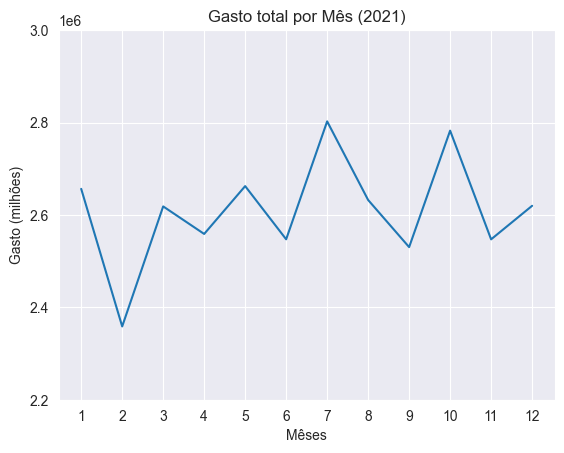

In [157]:
sns.set_style('darkgrid')
sns.lineplot(df_2021, x = "mes", y = "gasto")
plt.title("Gasto total por Mês (2021)")
plt.yticks([x for x in range(2200000,3100000,200000)])
plt.xticks(list(df_2021["mes"]))
plt.xlabel("Mêses")
plt.ylabel("Gasto (milhões)")
plt.show()

In [146]:
df_2022 = ano_meses_df.query('ano == 2022')
df_2022

,ano,mes,gasto
12,2022,1,2656149.96
13,2022,2,2318201.08
14,2022,3,2705190.76
15,2022,4,2543653.14
16,2022,5,2684556.89
17,2022,6,2613106.01
18,2022,7,2749554.99
19,2022,8,2638238.71
20,2022,9,2584908.39
21,2022,10,2755839.69


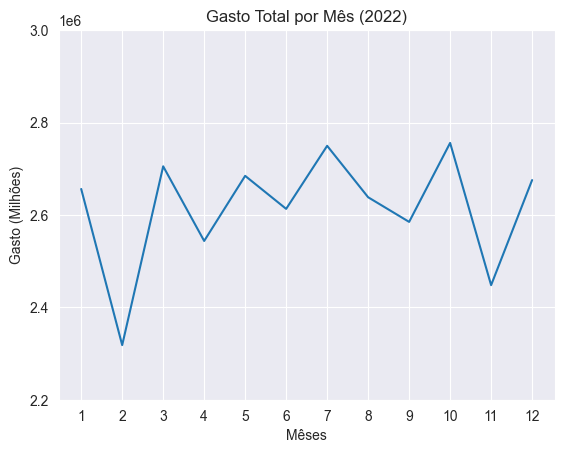

In [158]:
sns.set_style(style = "darkgrid")
sns.lineplot(df_2022,x="mes", y = "gasto")
plt.title("Gasto Total por Mês (2022)")
plt.ylabel("Gasto (Milhões)")
plt.xlabel("Mêses")
plt.yticks([x for x in range(2200000,3100000,200000)])
plt.xticks(list(df_2022["mes"]))
plt.show()
